In [2]:
import os
import re

import pandas as pd
import numpy as np

from datetime import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_dir = '/Users/boyuliu/pyprojects/Joann/Joann-Thailand-Project/notebooks/datasets/new_dataset/'

wv_data_file1 = 'regression_data_wv_cases1_causal_ma_detrend_20210301.csv'
# wv_data_file_lg_prov = 'regression_data_wv_cases1_causal_detrend_province_20_20210209.csv'
print(wv_data_file1)
df = pd.read_csv(data_dir + wv_data_file1)
print(df.shape)

df.head()

regression_data_wv_cases1_causal_ma_detrend_20210301.csv
(6554, 60)


,province,year_week,total_demand,perc_abuse,wv_count,ex_rate,fake_date,month,quarter,ex_rate_diff,...,demand_shock_plus_8,demand_shock_minus_1,demand_shock_minus_2,demand_shock_minus_3,demand_shock_minus_4,demand_shock_minus_5,demand_shock_minus_6,demand_shock_minus_7,demand_shock_minus_8,yr_wk_float
0,Ang Thong,2018-02,0.0,0.0,0.0,5.00602,2018-01-08,2018-01,2018-1,-0.032813,...,NaN,NaN,0.000000,0.983368,-0.245842,-0.245842,-0.245842,1.229210,-0.368763,2018.02
1,Ang Thong,2018-03,0.0,0.0,0.0,5.02540,2018-01-15,2018-01,2018-1,0.019380,...,NaN,0.000000,0.983368,-0.245842,-0.245842,-0.245842,1.229210,-0.368763,-0.368763,2018.03
2,Ang Thong,2018-04,0.0,0.0,0.0,5.03024,2018-01-22,2018-01,2018-1,0.004840,...,NaN,0.983368,-0.245842,-0.245842,-0.245842,1.229210,-0.368763,-0.368763,-0.368763,2018.04
3,Ang Thong,2018-05,10.0,0.0,0.0,5.03048,2018-01-29,2018-01,2018-1,0.000240,...,NaN,-0.245842,-0.245842,-0.245842,1.229210,-0.368763,-0.368763,-0.368763,-0.368763,2018.05
4,Ang Thong,2018-06,0.0,0.0,0.0,5.08050,2018-02-05,2018-02,2018-1,0.050020,...,NaN,-0.245842,-0.245842,1.229210,-0.368763,-0.368763,-0.368763,-0.368763,0.000000,2018.06


In [3]:
df.province.nunique()

58

In [4]:
data= df[['province','total_demand']].groupby('province').agg(['mean','std'])
data

total_demand            
                                 mean         std
province                                         
Ang Thong                    4.221239   10.214428
Bangkok                    779.256637  477.062436
Buri Ram                     3.362832    9.453894
Chachoengsao                61.026549   70.598394
Chainat                      4.318584   12.715475
Chaiyaphum                   6.194690   25.611053
Chanthaburi                  7.902655   24.871443
Chiang Mai                  16.530973   33.270287
Chiang Rai                   4.646018   16.958942
Chonburi                   242.035398  169.855029
Chumphon                    22.548673   40.783398
Kalasin                      0.221239    1.935267
Kamphaeng Phet               5.123894   15.256224
Kanchanaburi                87.548673  128.201013
Khon Kaen                   18.141593   43.144042
Krabi                       19.991150   43.799359
Lampang                     11.964602   35.081011
Lamphun                      2.477876   11.478316
Lopburi                     55.283186  112.652474
Nakhon Nayok                27.584071   63.013848
Nakhon Pathom              227.893805  189.274572
Nakhon Ratchasima           46.672566   73.502362
Nakhon Sawan                 8.469027   25.685276
Nakhon Si Thammarat         19.106195   30.083919
Narathiwat                   0.884956    6.204480
Nong Khai                    4.646018   18.331238
Nonthaburi                 190.787611  148.045025
Pathum Thani               249.088496  209.878092
Phang Nga                   19.442478   41.476529
Phetchabun                  12.619469   55.314090
Phetchaburi                132.141593  181.631931
Phitsanulok                  6.557522   22.490053
Phra Nakhon Si Ayutthaya   103.495575  125.662610
Phrae                        4.353982   12.788751
Phuket                     113.787611  144.268070
Prachin Buri                26.946903   45.363382
Prachuap Khiri Khan         38.513274   72.934917
Ranong                       0.548673    4.827361
Ratchaburi                 107.407080  103.371525
Rayong                     113.982301  122.409440
Sa Kaeo                      2.522124   11.242535
Sakon Nakhon                 1.575221    7.266367
Samut Prakan               283.610619  217.294132
Samut Sakhon               555.884956  385.653035
Samut Songkhram             15.548673   28.193842
Saraburi                    39.000000   50.541178
Satun                        0.849558    4.494483
Si Saket                     0.044248    0.470360
Sing Buri                    2.743363    6.733152
Songkhla                   174.654867  174.817699
Sukhothai                    3.168142    9.978461
Suphanburi                  41.035398   74.254501
Surat Thani                 90.584071   93.044222
Tak                         62.805310  130.724004
Trang                       27.017699   56.793168
Trat                         1.637168    8.357056
Udon Thani                   3.221239   10.425531
Uthai Thani                  1.026549    6.329438

In [5]:
16.334479 * 0.0819 / 0.237

5.644699705063291

In [6]:
0.1 * 100 * data['total_demand']['mean']/data['total_demand']['std']

province
Ang Thong                    4.132624
Bangkok                     16.334479
Buri Ram                     3.557087
Chachoengsao                 8.644184
Chainat                      3.396321
Chaiyaphum                   2.418757
Chanthaburi                  3.177401
Chiang Mai                   4.968690
Chiang Rai                   2.739568
Chonburi                    14.249528
Chumphon                     5.528885
Kalasin                      1.143196
Kamphaeng Phet               3.358560
Kanchanaburi                 6.829016
Khon Kaen                    4.204890
Krabi                        4.564256
Lampang                      3.410564
Lamphun                      2.158745
Lopburi                      4.907410
Nakhon Nayok                 4.377462
Nakhon Pathom               12.040381
Nakhon Ratchasima            6.349805
Nakhon Sawan                 3.297230
Nakhon Si Thammarat          6.350966
Narathiwat                   1.426317
Nong Khai                    2.534481
Non

In [7]:
beta = 0.19
plot_data = beta * 0.1 * 100 * data['total_demand']['mean']/data['total_demand']['std']
# 100 for percentage point, 0.1 for 10% increase, beta for effect 
# -> percentage point increase in abuse due to 10% increase in excess demand
plot_data = plot_data.reset_index().rename(columns={0:'value'}).sort_values('value', ascending=False)
plot_data

,province,value
1,Bangkok,3.103551
43,Samut Sakhon,2.738683
9,Chonburi,2.707410
42,Samut Prakan,2.479865
26,Nonthaburi,2.448555
20,Nakhon Pathom,2.287672
27,Pathum Thani,2.254967
38,Ratchaburi,1.974175
49,Songkhla,1.898230
52,Surat Thani,1.849763


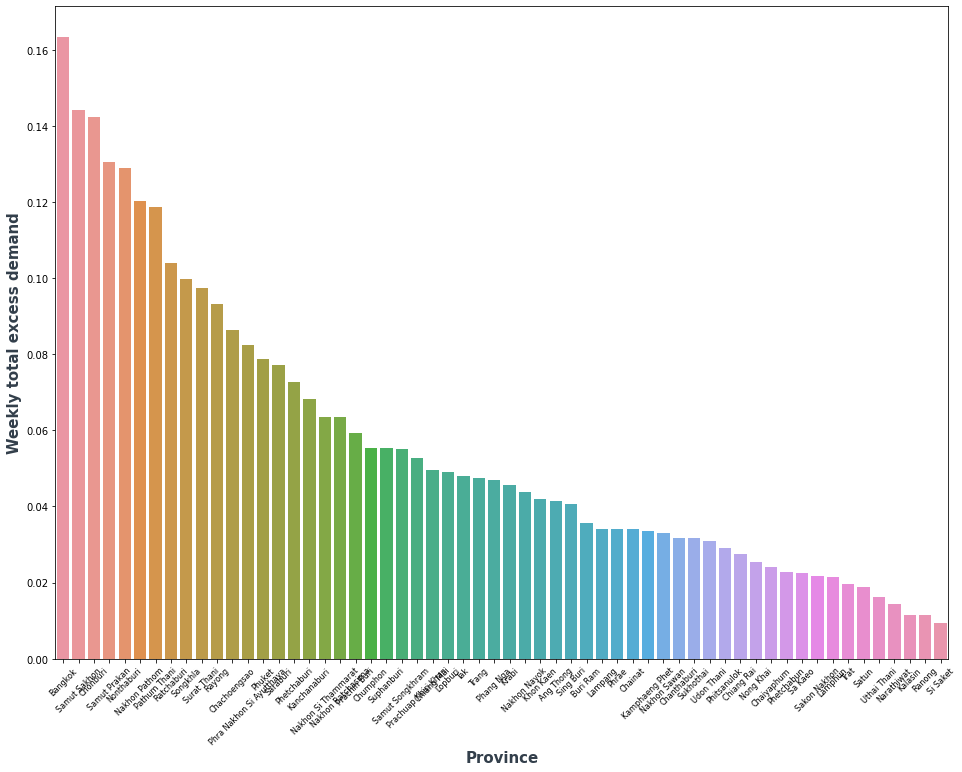

In [18]:
# a4_dims = (16, 12)
# fig, ax = plt.subplots(figsize=a4_dims)

# plot_data = plot_data.reset_index().rename(columns={0:'value'}).sort_values('value', ascending=False)
# bar_plot = sns.barplot(x='province',y='value', data=plot_data)
# for item in bar_plot.get_xticklabels():
#     item.set_rotation(45)
#     item.set_fontsize(8) 
# plt.ylabel('Weekly total excess demand', fontsize=15, fontweight='black', color = '#333F4B')
# plt.xlabel('Province', fontsize=15, fontweight='black', color = '#333F4B')
# # plt.title('Excess demand for Thai provinces', fontsize=15, fontweight='black', color = '#333F4B')    
# # plt.savefig('../../../plots/paper/demand_by_province.jpg')
# plt.show()

In [8]:
# df = pd.merge(df, data['total_demand']['mean'].reset_index(), on='province')

In [9]:
df.head()

,province,year_week,total_demand,perc_abuse,wv_count,ex_rate,fake_date,month,quarter,ex_rate_diff,...,demand_shock_minus_1,demand_shock_minus_2,demand_shock_minus_3,demand_shock_minus_4,demand_shock_minus_5,demand_shock_minus_6,demand_shock_minus_7,demand_shock_minus_8,yr_wk_float,mean
0,Ang Thong,2018-02,0.0,0.0,0.0,5.00602,2018-01-08,2018-01,2018-1,-0.032813,...,NaN,0.000000,0.983368,-0.245842,-0.245842,-0.245842,1.229210,-0.368763,2018.02,4.221239
1,Ang Thong,2018-03,0.0,0.0,0.0,5.02540,2018-01-15,2018-01,2018-1,0.019380,...,0.000000,0.983368,-0.245842,-0.245842,-0.245842,1.229210,-0.368763,-0.368763,2018.03,4.221239
2,Ang Thong,2018-04,0.0,0.0,0.0,5.03024,2018-01-22,2018-01,2018-1,0.004840,...,0.983368,-0.245842,-0.245842,-0.245842,1.229210,-0.368763,-0.368763,-0.368763,2018.04,4.221239
3,Ang Thong,2018-05,10.0,0.0,0.0,5.03048,2018-01-29,2018-01,2018-1,0.000240,...,-0.245842,-0.245842,-0.245842,1.229210,-0.368763,-0.368763,-0.368763,-0.368763,2018.05,4.221239
4,Ang Thong,2018-06,0.0,0.0,0.0,5.08050,2018-02-05,2018-02,2018-1,0.050020,...,-0.245842,-0.245842,1.229210,-0.368763,-0.368763,-0.368763,-0.368763,0.000000,2018.06,4.221239


In [10]:
df['10_perc_excess'] = df['total_demand'] > df['mean']*1.1
freq_data = 100*df.groupby('province').sum()['10_perc_excess'] / df.groupby('province').count()['year_week']
freq_data = freq_data.reset_index().rename(columns={0:'frequency'})
freq_data

,province,frequency
0,Ang Thong,23.893805
1,Bangkok,39.823009
2,Buri Ram,14.159292
3,Chachoengsao,29.203540
4,Chainat,14.159292
5,Chaiyaphum,9.734513
6,Chanthaburi,12.389381
7,Chiang Mai,24.778761
8,Chiang Rai,14.159292
9,Chonburi,38.938053


In [11]:
plot_data = pd.merge(plot_data, freq_data, on='province')

In [13]:
sum(df['demand_shock']>1)/df.shape[0]

0.10558437595361611

In [14]:
df['big_shock'] = df['demand_shock']>1
freq_data2 = df.groupby('province').sum()['big_shock']/ df.groupby('province').count()['year_week']
freq_data2 = freq_data2.reset_index().rename(columns={0:'frequency'})
freq_data2

,province,frequency
0,Ang Thong,0.097345
1,Bangkok,0.141593
2,Buri Ram,0.123894
3,Chachoengsao,0.132743
4,Chainat,0.123894
5,Chaiyaphum,0.061947
6,Chanthaburi,0.097345
7,Chiang Mai,0.115044
8,Chiang Rai,0.070796
9,Chonburi,0.159292


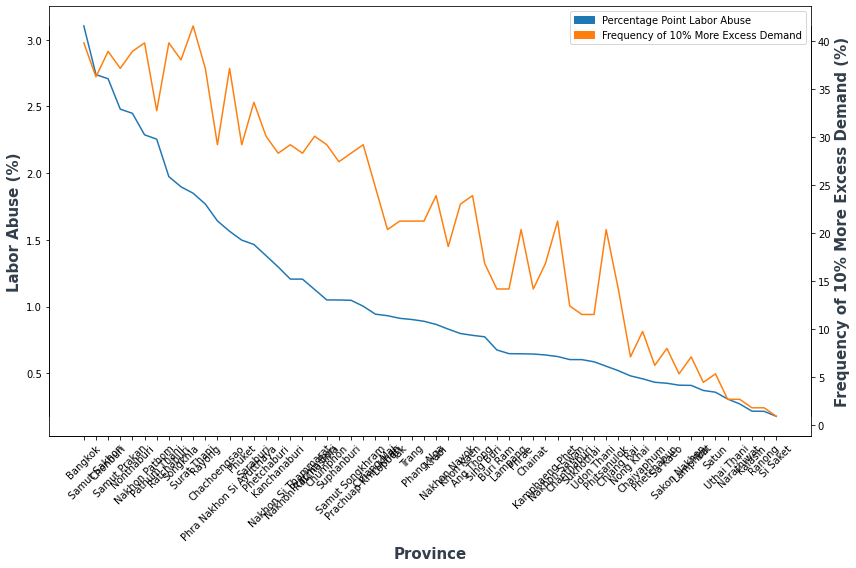

In [48]:
import matplotlib.patches as mpatches
from matplotlib import ticker

fig, ax1 = plt.subplots(1,1, figsize = (12, 8))
color = 'tab:blue'
plt.plot(plot_data.value, color=color)
ax1.set_ylabel('Labor Abuse (%)', fontsize=15, fontweight='black', color = '#333F4B')
xtick_locs = range(plot_data.shape[0])
plt.xticks(ticks=xtick_locs, labels=plot_data.province.values, rotation='45')
plt.xlabel('Province', fontsize=15, fontweight='black', color = '#333F4B')

ax2 = ax1.twinx()
color = 'tab:orange'
plt.plot(plot_data.frequency, color=color)
ax2.set_ylabel('Frequency of 10% More Excess Demand (%)', fontsize=15, fontweight='black', color = '#333F4B')

blue_patch = mpatches.Patch(color='tab:blue', label='Percentage Point Labor Abuse')
orange_patch = mpatches.Patch(color='tab:orange', label='Frequency of 10% More Excess Demand')
# plt.rcParams["legend.fontsize"] = 24
plt.legend(handles=[blue_patch, orange_patch])

# plt.title('Aggregate MOU demand and labor abuse in entire Thailand each week from 2018 Jan. to 2020 Feb.')

ax1.spines['top'].set_color('none')
ax2.spines['right'].set_bounds(plot_data.frequency.min(), plot_data.frequency.max())
ax1.spines['left'].set_bounds(plot_data.value.min(), plot_data.value.max())
# ax.spines['bottom'].set_smart_bounds(True)
fig.tight_layout() 
# plt.savefig('../../../plots/paper/province_disaggregation.jpg')
plt.show()

In [50]:
', '.join(plot_data.province.values)

'Bangkok, Samut Sakhon, Chonburi, Samut Prakan, Nonthaburi, Nakhon Pathom, Pathum Thani, Ratchaburi, Songkhla, Surat Thani, Rayong, Chachoengsao, Phra Nakhon Si Ayutthaya, Phuket, Saraburi, Phetchaburi, Kanchanaburi, Nakhon Si Thammarat, Nakhon Ratchasima, Prachin Buri, Chumphon, Suphanburi, Samut Songkhram, Prachuap Khiri Khan, Chiang Mai, Lopburi, Tak, Trang, Phang Nga, Krabi, Nakhon Nayok, Khon Kaen, Ang Thong, Sing Buri, Buri Ram, Lampang, Phrae, Chainat, Kamphaeng Phet, Nakhon Sawan, Chanthaburi, Sukhothai, Udon Thani, Phitsanulok, Chiang Rai, Nong Khai, Chaiyaphum, Phetchabun, Sa Kaeo, Sakon Nakhon, Lamphun, Trat, Satun, Uthai Thani, Narathiwat, Kalasin, Ranong, Si Saket'

In [49]:
plot_data[plot_data.province=='Bangkok']

,province,value,frequency
0,Bangkok,3.103551,39.823009


# province basics

In [71]:
df['total_abuse'] = df['perc_abuse'] * df['wv_count']
abuse_df = df[['province', 'total_abuse']].groupby('province').sum()['total_abuse'].reset_index()
abuse_df['wv_count'] = df[['province', 'wv_count']].groupby('province').sum()['wv_count'].values
abuse_df['abuse_perc'] = abuse_df['total_abuse'].divide(abuse_df['wv_count'], fill_value=0) * 100
abuse_df.head()

,province,total_abuse,wv_count,abuse_perc
0,Ang Thong,1.0,1.0,100.000000
1,Bangkok,423.0,2363.0,17.900973
2,Buri Ram,2.0,4.0,50.000000
3,Chachoengsao,57.0,180.0,31.666667
4,Chainat,0.0,1.0,0.000000


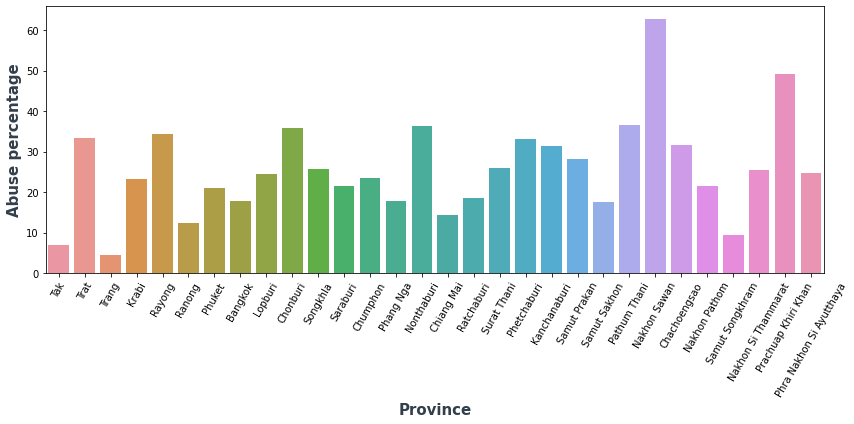

In [84]:
a4_dims = (12, 6)
fig, ax = plt.subplots(figsize=a4_dims)

plot_data = abuse_df[abuse_df.wv_count>20].copy()
plot_data['name_length'] = plot_data['province'].apply(len)
plot_data.sort_values('name_length', inplace=True)

sns.barplot(x="province", y="abuse_perc", data=plot_data)
xtick_locs = range(plot_data.shape[0])
plt.xticks(ticks=xtick_locs, labels=plot_data.province.values, rotation='60')
plt.ylabel('Abuse percentage', fontsize=15, fontweight='black', color = '#333F4B')
plt.xlabel('Province', fontsize=15, fontweight='black', color = '#333F4B')
fig.tight_layout() 
# plt.savefig('../../../plots/paper/province_abuse_overall.jpg')
plt.show()

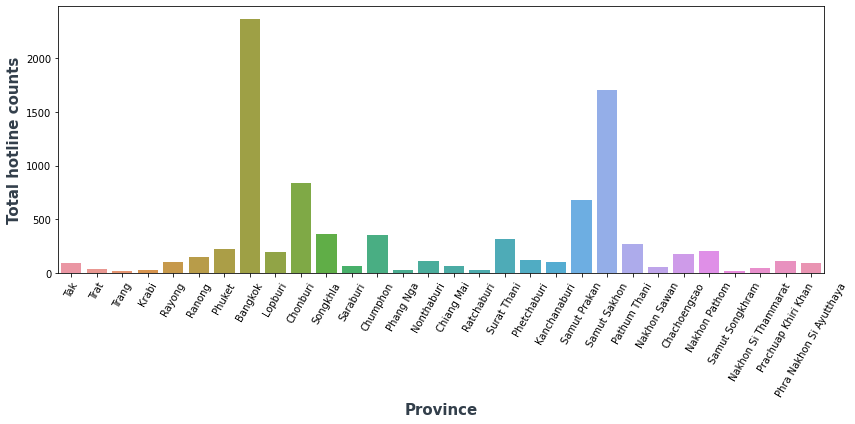

In [87]:
a4_dims = (12, 6)
fig, ax = plt.subplots(figsize=a4_dims)

plot_data = abuse_df[abuse_df.wv_count>20].copy()
plot_data['name_length'] = plot_data['province'].apply(len)
plot_data.sort_values('name_length', inplace=True)

sns.barplot(x="province", y="wv_count", data=plot_data)
xtick_locs = range(plot_data.shape[0])
plt.xticks(ticks=xtick_locs, labels=plot_data.province.values, rotation='60')
plt.ylabel('Total hotline counts', fontsize=15, fontweight='black', color = '#333F4B')
plt.xlabel('Province', fontsize=15, fontweight='black', color = '#333F4B')
fig.tight_layout() 
plt.savefig('../../../plots/paper/wv_count_by_province.jpg')
plt.show()

## use more conservative value in abstract

In [91]:
16.334479 * 0.0819 / 0.237

5.644699705063291

In [99]:
beta = 0.0819
abs_data = beta * 0.1 * 100 * data['total_demand']['mean']/data['total_demand']['std'] / 0.237 
# 100 for percentage point, 0.1 for 10% std increase, beta for effect 
# -> percentage point increase in abuse due to 10% increase in excess demand
abs_data = abs_data.reset_index().rename(columns={0:'value'}).sort_values('value', ascending=False)
abs_data = pd.merge(abs_data, freq_data, on='province')
abs_data.head()

,province,value,frequency
0,Bangkok,5.644700,39.823009
1,Samut Sakhon,4.981082,36.283186
2,Chonburi,4.924204,38.938053
3,Samut Prakan,4.510348,37.168142
4,Nonthaburi,4.453402,38.938053


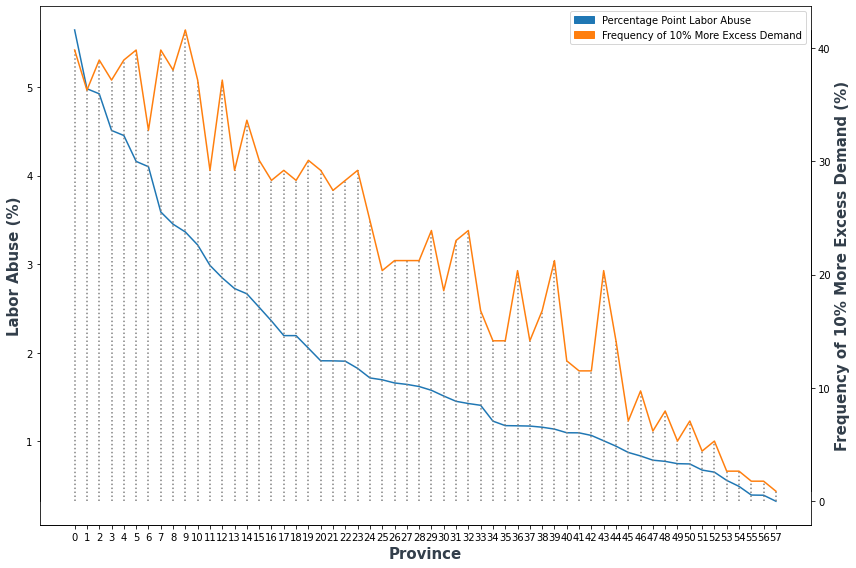

In [112]:
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.vlines.html
import matplotlib.patches as mpatches
from matplotlib import ticker

fig, ax1 = plt.subplots(1,1, figsize = (12, 8))
color = 'tab:blue'
plt.plot(abs_data.value, color=color)
ax1.set_ylabel('Labor Abuse (%)', fontsize=15, fontweight='black', color = '#333F4B')
xtick_locs = range(abs_data.shape[0])
plt.xticks(ticks=xtick_locs, labels=xtick_locs)
plt.xlabel('Province', fontsize=15, fontweight='black', color = '#333F4B')

ax2 = ax1.twinx()
color = 'tab:orange'
plt.plot(abs_data.frequency, color=color)
ax2.set_ylabel('Frequency of 10% More Labor Shortage (%)', fontsize=15, fontweight='black', color = '#333F4B')

blue_patch = mpatches.Patch(color='tab:blue', label='Percentage Point Labor Abuse')
orange_patch = mpatches.Patch(color='tab:orange', label='Frequency of 10% More Excess Demand')
# plt.rcParams["legend.fontsize"] = 24
plt.legend(handles=[blue_patch, orange_patch])

# plt.title('Aggregate MOU demand and labor abuse in entire Thailand each week from 2018 Jan. to 2020 Feb.')

ax1.spines['top'].set_color('none')
ax2.spines['right'].set_bounds(abs_data.frequency.min(), abs_data.frequency.max())
ax1.spines['left'].set_bounds(abs_data.value.min(), abs_data.value.max())

plt.vlines(xtick_locs, 0, abs_data.frequency, colors='grey', linestyles='dotted')
# ax.spines['bottom'].set_smart_bounds(True)
fig.tight_layout() 
plt.savefig('../../../plots/paper/province_disaggregation_conservative.jpg')
plt.show()

## use demand shock >1 as frequency

In [15]:
beta = 0.0819
abs_data = beta * 0.1 * 100 * data['total_demand']['mean']/data['total_demand']['std'] / 0.237 
# 100 for percentage point, 0.1 for 10% std increase, beta for effect 
# -> percentage point increase in abuse due to 10% increase in excess demand
abs_data = abs_data.reset_index().rename(columns={0:'value'}).sort_values('value', ascending=False)
abs_data = pd.merge(abs_data, freq_data2, on='province')
abs_data.head()

,province,value,frequency
0,Bangkok,5.644700,0.141593
1,Samut Sakhon,4.981082,0.159292
2,Chonburi,4.924204,0.159292
3,Samut Prakan,4.510348,0.176991
4,Nonthaburi,4.453402,0.194690


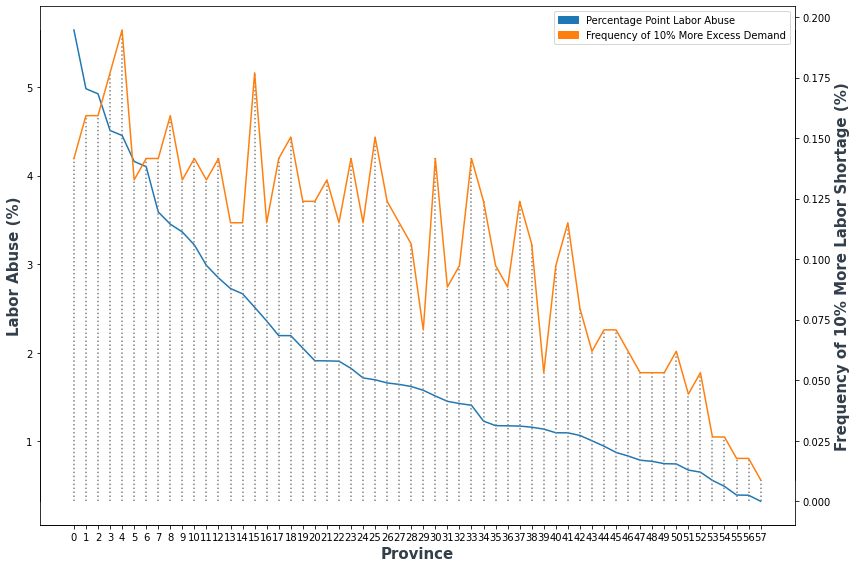

In [16]:
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.vlines.html
import matplotlib.patches as mpatches
from matplotlib import ticker

fig, ax1 = plt.subplots(1,1, figsize = (12, 8))
color = 'tab:blue'
plt.plot(abs_data.value, color=color)
ax1.set_ylabel('Labor Abuse (%)', fontsize=15, fontweight='black', color = '#333F4B')
xtick_locs = range(abs_data.shape[0])
plt.xticks(ticks=xtick_locs, labels=xtick_locs)
plt.xlabel('Province', fontsize=15, fontweight='black', color = '#333F4B')

ax2 = ax1.twinx()
color = 'tab:orange'
plt.plot(abs_data.frequency, color=color)
ax2.set_ylabel('Frequency of 10% More Labor Shortage (%)', fontsize=15, fontweight='black', color = '#333F4B')

blue_patch = mpatches.Patch(color='tab:blue', label='Percentage Point Labor Abuse')
orange_patch = mpatches.Patch(color='tab:orange', label='Frequency of 10% More Excess Demand')
# plt.rcParams["legend.fontsize"] = 24
plt.legend(handles=[blue_patch, orange_patch])

# plt.title('Aggregate MOU demand and labor abuse in entire Thailand each week from 2018 Jan. to 2020 Feb.')

ax1.spines['top'].set_color('none')
ax2.spines['right'].set_bounds(abs_data.frequency.min(), abs_data.frequency.max())
ax1.spines['left'].set_bounds(abs_data.value.min(), abs_data.value.max())

plt.vlines(xtick_locs, 0, abs_data.frequency, colors='grey', linestyles='dotted')
# ax.spines['bottom'].set_smart_bounds(True)
fig.tight_layout() 
# plt.savefig('../../../plots/paper/province_disaggregation_conservative.jpg')
plt.show()

In [109]:
abs_data['idx'] = abs_data.index
abs_data['legend'] = abs_data.apply(lambda row: str(row.idx)+ ' - '+str(row.province), axis=1)
abs_data.head()

,province,value,frequency,legend,idx
0,Bangkok,5.644700,39.823009,0 - Bangkok,0
1,Samut Sakhon,4.981082,36.283186,1 - Samut Sakhon,1
2,Chonburi,4.924204,38.938053,2 - Chonburi,2
3,Samut Prakan,4.510348,37.168142,3 - Samut Prakan,3
4,Nonthaburi,4.453402,38.938053,4 - Nonthaburi,4


In [110]:
print('\n'.join(abs_data.legend))

0 - Bangkok
1 - Samut Sakhon
2 - Chonburi
3 - Samut Prakan
4 - Nonthaburi
5 - Nakhon Pathom
6 - Pathum Thani
7 - Ratchaburi
8 - Songkhla
9 - Surat Thani
10 - Rayong
11 - Chachoengsao
12 - Phra Nakhon Si Ayutthaya
13 - Phuket
14 - Saraburi
15 - Phetchaburi
16 - Kanchanaburi
17 - Nakhon Si Thammarat
18 - Nakhon Ratchasima
19 - Prachin Buri
20 - Chumphon
21 - Suphanburi
22 - Samut Songkhram
23 - Prachuap Khiri Khan
24 - Chiang Mai
25 - Lopburi
26 - Tak
27 - Trang
28 - Phang Nga
29 - Krabi
30 - Nakhon Nayok
31 - Khon Kaen
32 - Ang Thong
33 - Sing Buri
34 - Buri Ram
35 - Lampang
36 - Phrae
37 - Chainat
38 - Kamphaeng Phet
39 - Nakhon Sawan
40 - Chanthaburi
41 - Sukhothai
42 - Udon Thani
43 - Phitsanulok
44 - Chiang Rai
45 - Nong Khai
46 - Chaiyaphum
47 - Phetchabun
48 - Sa Kaeo
49 - Sakon Nakhon
50 - Lamphun
51 - Trat
52 - Satun
53 - Uthai Thani
54 - Narathiwat
55 - Kalasin
56 - Ranong
57 - Si Saket


# sort by values

In [5]:
df['total_abuse'] = df['perc_abuse'] * df['wv_count']
abuse_df = df[['province', 'total_abuse']].groupby('province').sum()['total_abuse'].reset_index()
abuse_df['wv_count'] = df[['province', 'wv_count']].groupby('province').sum()['wv_count'].values
abuse_df['abuse_perc'] = abuse_df['total_abuse'].divide(abuse_df['wv_count'], fill_value=0) * 100
abuse_df.head()

,province,total_abuse,wv_count,abuse_perc
0,Ang Thong,1.0,1.0,100.000000
1,Bangkok,423.0,2363.0,17.900973
2,Buri Ram,2.0,4.0,50.000000
3,Chachoengsao,57.0,180.0,31.666667
4,Chainat,0.0,1.0,0.000000


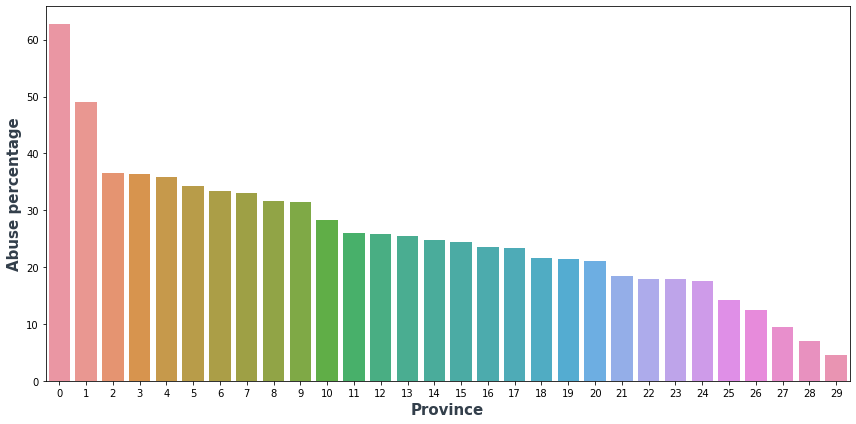

In [13]:
a4_dims = (12, 6)
fig, ax = plt.subplots(figsize=a4_dims)

plot_data = abuse_df[abuse_df.wv_count>20].copy()
# plot_data['name_length'] = plot_data['province'].apply(len)
plot_data.sort_values('abuse_perc', inplace=True, ascending=False)

sns.barplot(x="province", y="abuse_perc", data=plot_data)
xtick_locs = range(plot_data.shape[0])
plt.xticks(ticks=xtick_locs, labels=xtick_locs)
plt.ylabel('Abuse percentage', fontsize=15, fontweight='black', color = '#333F4B')
plt.xlabel('Province', fontsize=15, fontweight='black', color = '#333F4B')
fig.tight_layout() 
plt.savefig('../../../plots/paper/province_abuse_overall.jpg')
plt.show()


In [17]:
plot_data = plot_data.reset_index()
plot_data['idx'] = plot_data.index
plot_data['legend'] = plot_data.apply(lambda row: str(row.idx)+ ' - '+str(row.province), axis=1)
print('\n'.join(plot_data.legend))
# print(plot_data.province.values)

0 - Nakhon Sawan
1 - Prachuap Khiri Khan
2 - Pathum Thani
3 - Nonthaburi
4 - Chonburi
5 - Rayong
6 - Trat
7 - Phetchaburi
8 - Chachoengsao
9 - Kanchanaburi
10 - Samut Prakan
11 - Surat Thani
12 - Songkhla
13 - Nakhon Si Thammarat
14 - Phra Nakhon Si Ayutthaya
15 - Lopburi
16 - Chumphon
17 - Krabi
18 - Saraburi
19 - Nakhon Pathom
20 - Phuket
21 - Ratchaburi
22 - Bangkok
23 - Phang Nga
24 - Samut Sakhon
25 - Chiang Mai
26 - Ranong
27 - Samut Songkhram
28 - Tak
29 - Trang


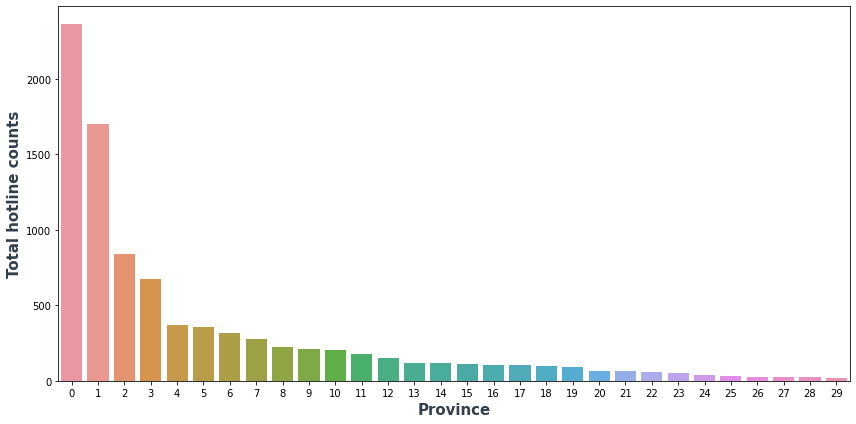

In [18]:
a4_dims = (12, 6)
fig, ax = plt.subplots(figsize=a4_dims)

# plot_data = abuse_df[abuse_df.wv_count>20].copy()
# plot_data['name_length'] = plot_data['province'].apply(len)
# plot_data.sort_values('name_length', inplace=True)
plot_data.sort_values('wv_count', inplace=True, ascending=False)

sns.barplot(x="province", y="wv_count", data=plot_data)
xtick_locs = range(plot_data.shape[0])
plt.xticks(ticks=xtick_locs, labels=xtick_locs)
plt.ylabel('Total hotline counts', fontsize=15, fontweight='black', color = '#333F4B')
plt.xlabel('Province', fontsize=15, fontweight='black', color = '#333F4B')
fig.tight_layout() 
plt.savefig('../../../plots/paper/wv_count_by_province.jpg')
plt.show()

In [19]:
plot_data = plot_data.reset_index()
plot_data['idx'] = plot_data.index
plot_data['legend'] = plot_data.apply(lambda row: str(row.idx)+ ' - '+str(row.province), axis=1)
print('\n'.join(plot_data.legend))
# print(plot_data.province.values)

0 - Bangkok
1 - Samut Sakhon
2 - Chonburi
3 - Samut Prakan
4 - Songkhla
5 - Chumphon
6 - Surat Thani
7 - Pathum Thani
8 - Phuket
9 - Nakhon Pathom
10 - Lopburi
11 - Chachoengsao
12 - Ranong
13 - Phetchaburi
14 - Nonthaburi
15 - Prachuap Khiri Khan
16 - Kanchanaburi
17 - Rayong
18 - Tak
19 - Phra Nakhon Si Ayutthaya
20 - Saraburi
21 - Chiang Mai
22 - Nakhon Sawan
23 - Nakhon Si Thammarat
24 - Trat
25 - Krabi
26 - Phang Nga
27 - Ratchaburi
28 - Trang
29 - Samut Songkhram
